<a href="https://colab.research.google.com/github/cyamax/time_series_forecast_lab/blob/main/Darts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
!pip install 'u8darts[all]'

     |████████████████████████████████| 2.1MB 2.7MB/s 
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21


In [13]:
!wget https://raw.githubusercontent.com/unit8co/darts/master/examples/AirPassengers.csv

--2020-10-22 13:03:22--  https://raw.githubusercontent.com/unit8co/darts/master/examples/AirPassengers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1746 (1.7K) [text/plain]
Saving to: ‘AirPassengers.csv.1’

AirPassengers.csv.1 100%[===================>]   1.71K  --.-KB/s    in 0s      

2020-10-22 13:03:22 (30.1 MB/s) - ‘AirPassengers.csv.1’ saved [1746/1746]



In [59]:
%load_ext autoreload
#python実行時に毎回モジュールをリロードする
%autoreload 2
# matplotlibでは、plt.showを呼ぶと描画を行う。ただし、inline指定の場合、plt.showを省略可能
%matplotlib inline 

import sys
import pandas as pd
import numpy as np
from datetime import datetime
import time
import matplotlib.pyplot as plt

from darts import TimeSeries
from darts.models import (
    NaiveSeasonal,
    NaiveDrift,
    Prophet,
    ExponentialSmoothing,
    ARIMA,
    AutoARIMA,
    StandardRegressionModel,
    Theta,
    FFT
)
from darts.metrics import mape, mase
from darts.utils.statistics import check_seasonality, plot_acf, plot_residuals_analysis

import warnings
# warnings.filterwarnings("ignore") 
import logging
logging.disable(logging.CRITICAL)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


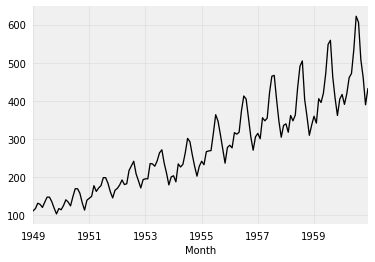

In [60]:
df = pd.read_csv('AirPassengers.csv', delimiter=",")
series = TimeSeries.from_dataframe(df, 'Month', ['#Passengers'])

series.plot()

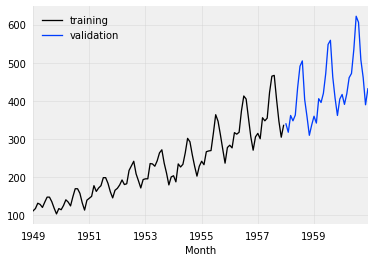

In [61]:
train, val = series.split_before(pd.Timestamp('19580101'))
train.plot(label='training')
val.plot(label='validation')
plt.legend();

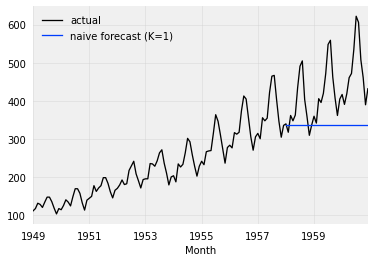

In [55]:
naive_model = NaiveSeasonal(K=1)
naive_model.fit(train)
naive_forecast = naive_model.predict(36)

series.plot(label='actual')
naive_forecast.plot(label='naive forecast (K=1)')
plt.legend();

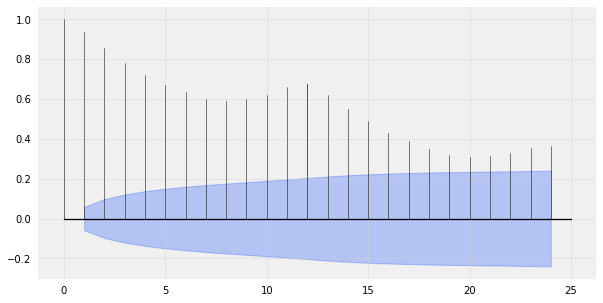

In [68]:
plot_acf(train, m = 12,alpha=0.05)

In [67]:
for m in range(2, 25):
    # alphaは信頼区間の水準。上図の青い部分。設定は信頼区間=5%
    is_seasonal, period = check_seasonality(train, m=m, alpha=.05)
    if is_seasonal:
        print('There is seasonality of order {}.'.format(period))

There is seasonality of order 12.
